In [ ]:
# plot_introgressed_pleiotropy.ipynb
"""""""""""""""""""""""""""""""""
# Author: Keila Velazquez-Arcelay
# 
# Description: Pleiotropy test. Plot the counts of GWAS phenotypes per introgressed SNP
#              in two sets of SNPs: Circadian and Non-circadian. The GWAS associations 
#              were extracted from Opentargets.
#
"""""""""""""""""""""""""""""""""



In [24]:
# INPUT DATA
TRAIT_COUNTS = '../data/plotting_gwas_traits_per_snp.tsv'


import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.pylab as plt
sns.set(rc = {'figure.figsize':(14,10)})
sns.set_style("whitegrid")
sns.set_context("poster")


def check_distribution(data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot histogram
    ax1 = axes[0]
    ax1.hist(data, bins=20, density=True, alpha=0.6, color='b')
    mu, sigma = np.mean(data), np.std(data)
    x = np.linspace(min(data), max(data), 100)
    pdf = stats.norm.pdf(x, mu, sigma)
    ax1.plot(x, pdf, 'r')
    ax1.set_xlabel('Phenotype Counts')
    ax1.set_ylabel('Probability Density')
    ax1.set_title('Distribution of the Data')

    # Q-Q plot
    ax2 = axes[1]
    stats.probplot(data, dist='norm', plot=ax2)
    ax2.set_title('Q-Q Plot')

    plt.tight_layout()
    #plt.savefig("../plots/gwas_traits_per_snp.pdf", dpi=500)
    plt.show()


def plot_boxplot(df,y,title):
    sns.boxplot(x='SET',y=y, data=df, showfliers = False)
    #sns.stripplot(x='Set',y=y, data=df)#, showfliers = False)
    plt.ylabel('Phenotypes per variant')
    plt.title(title)



In [25]:
# LOAD DATA
ot_tps = pd.read_csv(TRAIT_COUNTS, sep='\t')

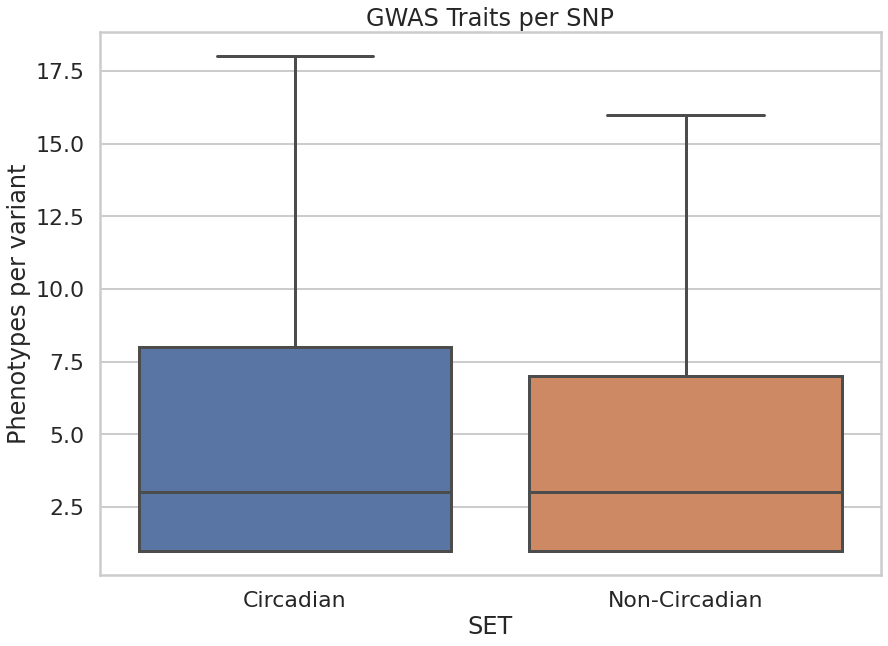

In [15]:
# PLOT THE NUMBER OF TRAITS ASSOCIATED WITH EACH SNP
plot_boxplot(ot_tps, 'COUNTS', 'GWAS Traits per SNP')

In [ ]:
# We observe a small difference between both sets. But is this difference significant?

In [43]:
# TEST IF THE SETS BELONG TO THE SAME DISTRIBUTION
# Mann Whitney U test: 
#    Compares the distribution of two groups when the data is not normally distributed.
#    Focuses on the rank orders of the data rather than the actual values
#    Sensitive to differences in the median or shape of the distributions. 
#    Doesn't assume that the distributions are the same, only their shapes.
#    Focuses on the medians or rank orders of the data.
U1, U1_P = mannwhitneyu(ot_tps[ot_tps['SET']=='Non-Circadian']['COUNTS'],
                     ot_tps[ot_tps['SET']=='Circadian']['COUNTS'])
print(f'Mann Whitney U P-value: {round(U1_P,8)}')

# Two-sample Kolmogorov-Smirnov test:
#    Assumes continuous distributions.
#    Based on the max difference between the empirical distribution functions of two samples.
#    Looks at the overall distribution shape.
#    Sensitive to differences in the shape of the distributions.
#    If one set has a few extreme values, it can have a larger impact on the test.
KS, KS_P = ks_2samp(ot_tps[ot_tps['SET']=='Non-Circadian']['COUNTS'],
               ot_tps[ot_tps['SET']=='Circadian']['COUNTS'])
print(f'Two-sample Kolmogorov-Smirnov P-value: {round(KS_P,8)}')


Mann Whitney U P-value: 0.04119191
Two-sample Kolmogorov-Smirnov P-value: 5.05e-06


In [ ]:
# The results from two statistics are strikinly different. 

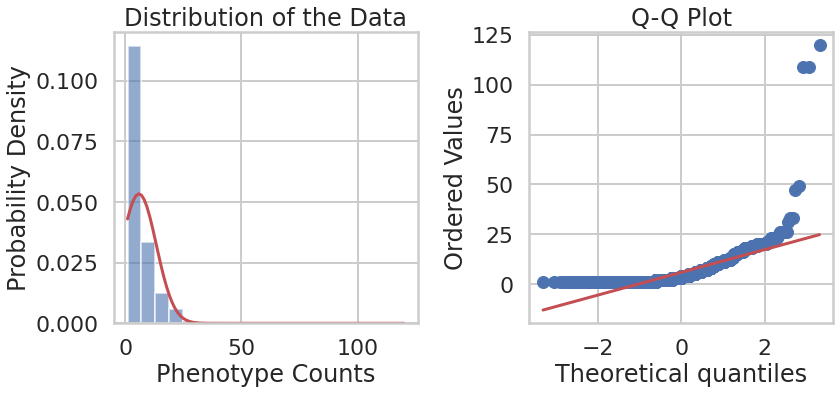

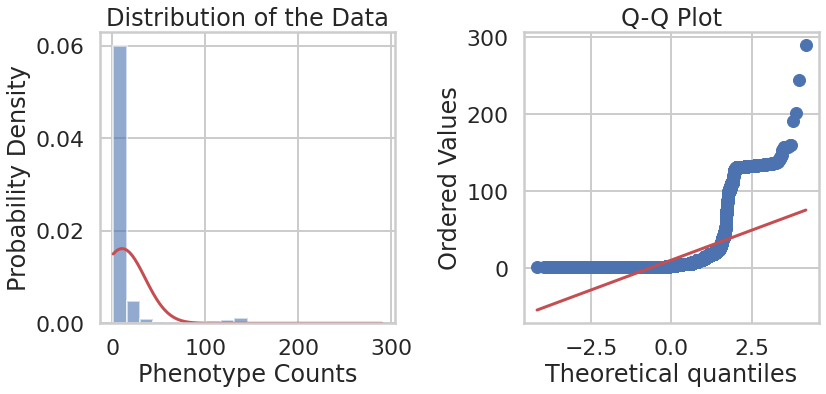

In [23]:
# CHECK IF THE DATA ARE NORMALLY DISTRIBUTED
check_distribution(ot_tps[ot_tps['SET']=='Circadian']['COUNTS'])
check_distribution(ot_tps[ot_tps['SET']=='Non-Circadian']['COUNTS'])

In [ ]:
# The distribution is not normal in either of the sets.
# We will rely on the Mann Whitney U test results.
# Although the resulting P-value of 0.04119191 is significant, it is marginally significant.
# One thing to note is that many of the SNPs are not associated with any GWAS trait.
# We can test if any of the sets contain significantly more of these SNPs.

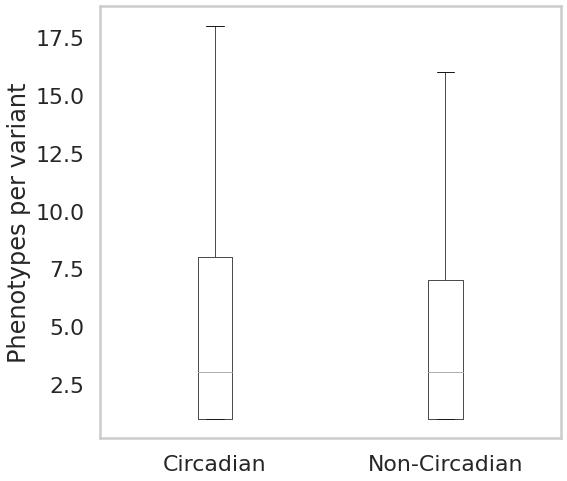

In [44]:
ax = ot_tps.boxplot(column='COUNTS', by='SET', showfliers = False,
                   figsize=(8, 8), grid=False)

ax.set_ylabel("Phenotypes per variant")
ax.set_xlabel('')

plt.title('');
plt.suptitle('');
